# Exploratory Data Analysis

This notebook focusses on the first step of any data science project: exploring the data.<br>
*Exploratory Data Analysis* or EDA is to get familiar to our data, identifying important columns, perform data manipulation and 
asking interesting questions from our data using visualization tools.

###  Data Description  <a id='dd'></a>
Zomato API Analysis is one of the most useful analysis for foodies who want to taste the best cuisines of every part of the world which lies in their budget. This analysis is also for those who want to find the value for money restaurants in various parts of the country for the cuisines. Additionally, this analysis caters the needs of people who are striving to get the best cuisine of the country and which locality of that country serves that cuisines with maximum number of restaurants.<br><br>

 Data has been collected from the Zomato API in the form of .json files(raw data) using the url=https://developers.zomato.com/api/v2.1/search?entity_id=1&entity_type=city&start=1&count=20<br>
 
The collected data is stored in a Comma Separated File Zomato.csv

Each restaurant in the dataset is uniquely identified by its Restaurant Id. Every restaurant contains the following variables: <br>

* Restaurant Id: Unique id of every restaurant across various cities of the world <br>
* Restaurant Name: Name of the restaurant <br>
* Country Code: Country in which restaurant is located <br> 
* City: City in which restaurant is located <br>
* Address: Address of the restaurant <br>
* Locality: Location in the city <br>
* Locality Verbose: Detailed description of the locality <br>
* Longitude: Longitude coordinate of the restaurant's location <br>
* Latitude: Latitude coordinate of the restaurant's location <br>
* Cuisines: Cuisines offered by the restaurant <br>
* Average Cost for two: Cost for two people in different currencies <br> 
* Currency: Currency of the country <br>
* Has Table booking: yes/no <br>
* Has Online delivery: yes/ no <br>
* Is delivering: yes/ no <br>
* Switch to order menu: yes/no <br>
* Price range: range of price of food <br>
* Aggregate Rating: Average rating out of 5 <br>
* Rating color: depending upon the average rating color <br>
* Rating text: text on the basis of rating of rating <br>
* Votes: Number of ratings casted by people<br>


### Objective: 
#### Our goal in this notebook is to explore the data provided in Zomato csv and to analyze which restaurants have poor ratings in Zomato and why?

In [0]:
import pandas as pd                                 # Importing pandas
import numpy as np                                  # Importing numpy
import matplotlib.pyplot as plt                     # Importing matplotlib for visualization

%matplotlib inline                      
import seaborn as sns                               # Importing seaborn for visualization

import matplotlib.ticker as ticker
import matplotlib.cm as cm

import pandas_profiling                             # AUtomatic EDA

import ipywidgets as widgets                        # Creating widgets
from IPython.display import display                 # Displaying widgets

### Loading the datasets 

The csv file has encoding ISO-8859-1.
Encoding defines what kind of characters(ASCII or non ASCII or something different) can be stored in a file.  

In [0]:
zomato_df = pd.read_csv('zomato.csv',encoding = "ISO-8859-1")    # Reading file zomato.csv

### Pandas Profiling

In [0]:
report = pandas_profiling.ProfileReport(zomato_df)                # Perform pandas profiling on the dataset    

report.to_file("zomato_data.html")                                # covert profile report as html file

In [5]:
zomato_df.head()                                                  # Visualizing top 5 rows

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [0]:
country_df = pd.read_excel('Country-Code.xlsx')                         # Reading country code excel file

In [7]:
zomato_data = pd.merge(zomato_df, country_df, on = 'Country Code')      # Pandas Merge function to join two dataframes
zomato_data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


### Interactive Exploration of Data

In [0]:
# Function to extract all the unique values
# A column will have mutiple values which can be repeatative. We are extracting the unique values and sorting them.

ALL = 'ALL'
def unique_sorted_values_plus_ALL(array):
    unique = array.unique().tolist()
    unique.sort()
    unique.insert(0, ALL)
    return unique

In [9]:
output = widgets.Output()

# Creating 3 dropdowns

# Country dropdown
dropdown_country = widgets.Dropdown(options = unique_sorted_values_plus_ALL(zomato_data['Country']), description='Country')

# City dropdown
dropdown_city = widgets.Dropdown(options = unique_sorted_values_plus_ALL(zomato_data['City']), description='City')

# Rating dropdown
dropdown_rating = widgets.Dropdown(options = unique_sorted_values_plus_ALL(zomato_data['Rating text']), description='Rating')

# Define a function for common_filtering
# Here we will define what output we can get for different dropdown options
def common_filtering(country, city, rating):
    output.clear_output()
    
    if (country == ALL) & (city == ALL) & (rating == ALL):
        common_filter = zomato_data
    elif(city == ALL) & (rating == ALL):
        common_filter = zomato_data[(zomato_data['Country'] == country)]
    elif(country == ALL) & (rating == ALL):
        common_filter = zomato_data[(zomato_data['City'] == city)]
    elif(country == ALL) & (city == ALL):
        common_filter = zomato_data[(zomato_data['Rating text'] == rating)]
    elif (country == ALL):
        common_filter = zomato_data[(zomato_data['City'] == city) & (zomato_data['Rating text'] == rating)]
    elif (city == ALL):
        common_filter = zomato_data[(zomato_data['Country'] == country) & (zomato_data['Rating text'] == rating)]
    elif (rating == ALL):
        common_filter = zomato_data[(zomato_data['City'] == city) & (zomato_data['Country'] == country)]
    
                                    
    else:
        common_filter = zomato_data[(zomato_data['City'] == city) & 
                                  (zomato_data['Country'] == country) &
                                 (zomato_data['Rating text'] == rating)]
    
    with output:
        display(common_filter)

# Define the event handler

# Country dropdown event handler
def dropdown_country_eventhandler(change):                         
    common_filtering(change.new, dropdown_city.value, dropdown_rating.value)  # Here we need to accept country event change
# City dropdown event handler
def dropdown_city_eventhandler(change):
    common_filtering(dropdown_country.value, change.new, dropdown_rating.value) # Here we need to accept city event change
# Rating Text dropdown event handler
def dropdown_rating_eventhandler(change):
    common_filtering(dropdown_country.value, dropdown_city.value, change.new)  # Here we need to accept rating event change
  

# Bind the event handler to the drop downs

dropdown_country.observe(dropdown_country_eventhandler, names='value')
dropdown_city.observe(dropdown_city_eventhandler, names='value')
dropdown_rating.observe(dropdown_rating_eventhandler, names='value')

# Display the dropdowns
input_widgets = widgets.HBox([dropdown_country, dropdown_city, dropdown_rating])
display(input_widgets)



In [10]:
display(output)                                        # Display the output

Output()

### Data Exploration

**Description of the numeric columns of dataset**

In [0]:
zomato_data[['Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']].describe()

,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.000000,9551.000000,9551.000000,9551.000000
mean,1199.210763,1.804837,2.666370,156.909748
std,16121.183073,0.905609,1.516378,430.169145
min,0.000000,1.000000,0.000000,0.000000
25%,250.000000,1.000000,2.500000,5.000000
50%,400.000000,2.000000,3.200000,31.000000
75%,700.000000,2.000000,3.700000,131.000000
max,800000.000000,4.000000,4.900000,10934.000000


**Observation**<br>
There are 9551 rows in all columns and there are no missing data in numeric columns. <br>
**Average Cost for two** <br>
The Standard Deviation is very high on 'Average Cost for two'. 
It is for different countries having different currency. <br>
There are 15 countries in this dataset and their currencies are not standardized. <br>
Look at the maximum of average price for two : 800000.

In [0]:
zomato_data[zomato_data['Average Cost for two'] == 800000]             # Extract rows which meet a specific condition

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
9283,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",...,No,No,No,No,3,4.1,Green,Very Good,1498,Indonesia
9284,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",...,No,No,No,No,3,4.6,Dark Green,Excellent,873,Indonesia


On comparing 800000 Indonesian Rupiah to INR it is 3800INR, which is slightly high end.

**Info of the dataset**

In [0]:
zomato_data.info()                                          # Checking the info of the dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
Restaurant ID           9551 non-null int64
Restaurant Name         9551 non-null object
Country Code            9551 non-null int64
City                    9551 non-null object
Address                 9551 non-null object
Locality                9551 non-null object
Locality Verbose        9551 non-null object
Longitude               9551 non-null float64
Latitude                9551 non-null float64
Cuisines                9542 non-null object
Average Cost for two    9551 non-null int64
Currency                9551 non-null object
Has Table booking       9551 non-null object
Has Online delivery     9551 non-null object
Is delivering now       9551 non-null object
Switch to order menu    9551 non-null object
Price range             9551 non-null int64
Aggregate rating        9551 non-null float64
Rating color            9551 non-null object
Rating text             9551 non-null o

**Observation** <br>
There are no missing values in any columns except in cuisines. <br>
Most of the rows are of datatype object i.e. they are categorical.

**Missing values Imputation**

In [0]:
# Filling the missing values in Cuisines

zomato_data['Cuisines'].fillna("Others", inplace=True)

In [0]:
# Filling any numeric missing values

zomato_data['Aggregate rating'].fillna(zomato_data['Aggregate rating'].mean(), inplace=True)

In [0]:
zomato_data.shape                                    # Number of rows and columns in a dataframe

(9551, 22)

**Correlation plot of numeric columns**

In [0]:
correlation = zomato_data[['Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']].corr()
correlation

,Average Cost for two,Price range,Aggregate rating,Votes
Average Cost for two,1.000000,0.075083,0.051792,0.067783
Price range,0.075083,1.000000,0.437944,0.309444
Aggregate rating,0.051792,0.437944,1.000000,0.313691
Votes,0.067783,0.309444,0.313691,1.000000


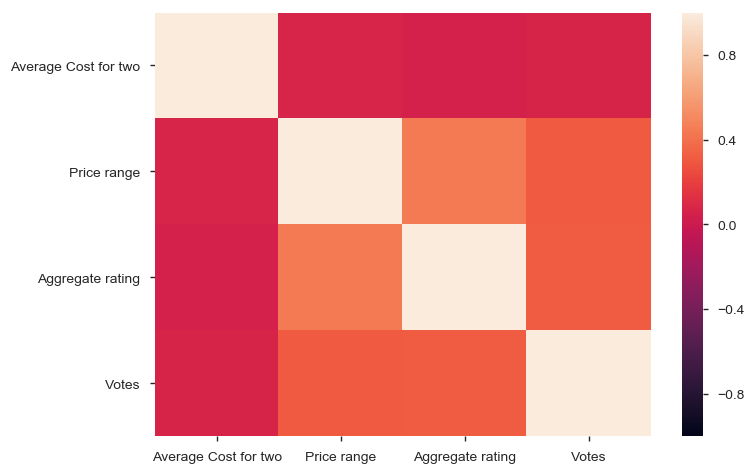

In [0]:
sns.heatmap(correlation, vmin = -1, vmax = 1)                # Creating heatmap of the correlation matrix

**Observation** <br>
There is some correlation between *Price range* and *Aggregate rating* <br> 
The rest of the columns have no correlation. <br>

If the Price range is higher, people should rate the restaurant higher.

**Distribution of Aggregate Rating**

C:\Users\Avinash\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



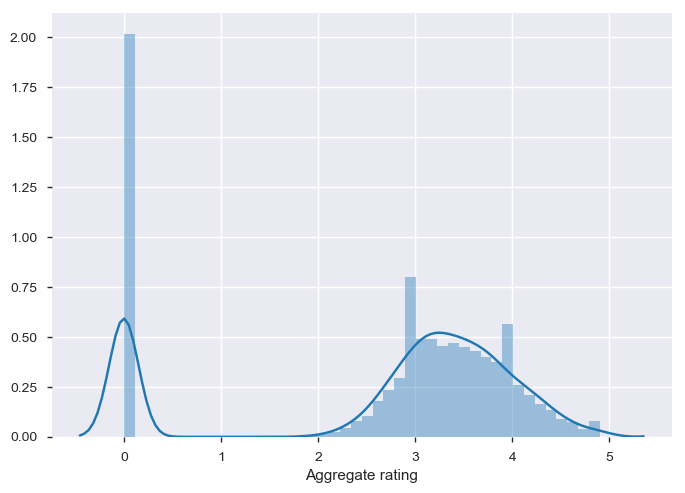

In [0]:
sns.distplot(zomato_data['Aggregate rating']);

**Observation**:  <br>
A lot of restaurants are rated 0. After this most of the restaurants have been rated between 3 and 4.

### Bivariate Analysis

Here we check the relationship between two variables.

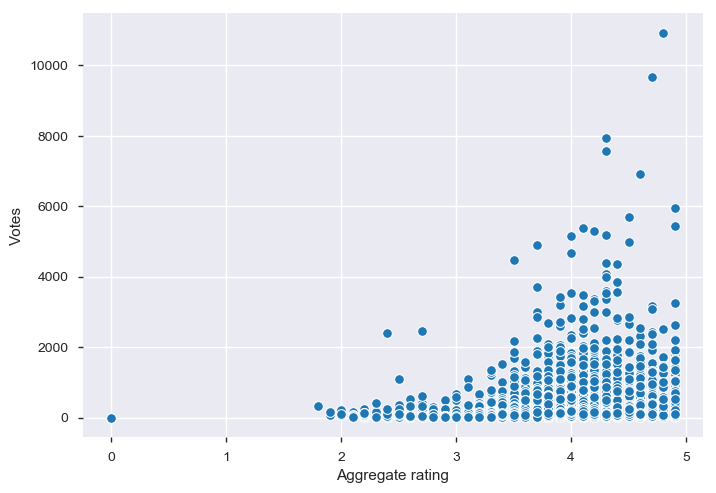

In [0]:
# Relationship between Aggregate Ratings and Votes

sns.scatterplot(x=zomato_data['Aggregate rating'], y= zomato_data['Votes'])

**Observation**: As the quality of food gets better, the aggregate ratings increases and the number of voters also increase.

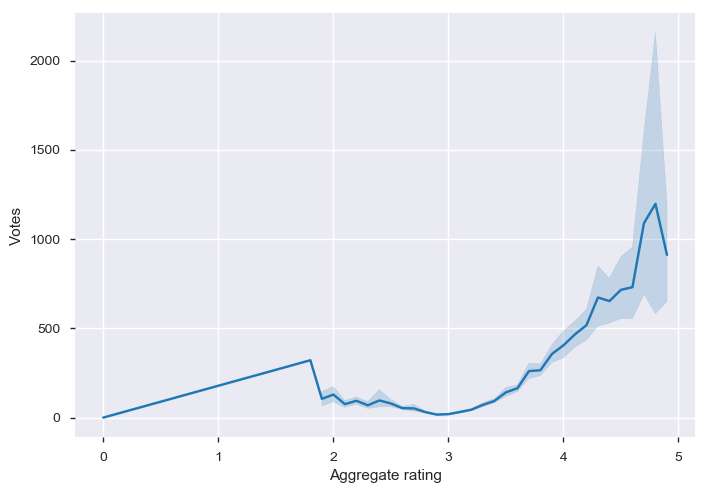

In [0]:
# Relationship between Aggregate Ratings and Votes

sns.lineplot(x=zomato_data['Aggregate rating'], y= zomato_data['Votes'])

**Obeservation** : Here we can see the same inference. Aggregate Ratings and Votes have an increasing trend.

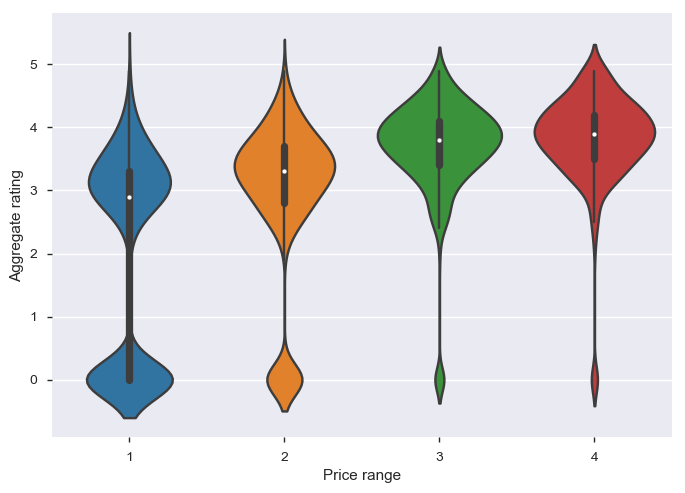

In [0]:
# Relationship between Price range and Aggregate Ratings

sns.violinplot(x='Price range', y='Aggregate rating', data = zomato_data)

**Observation 1** <br>
Here we can clearly see that with increase in Price range, the median of ratings also increase.

**Question: Which countries have the highest number of restaurants in Zomato?**

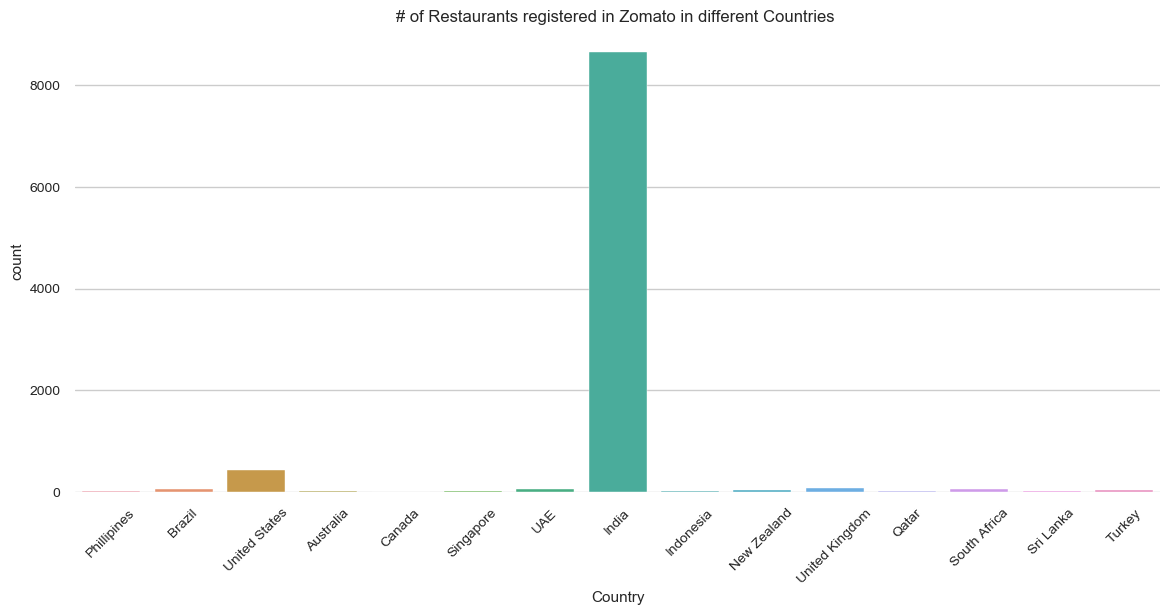

In [0]:
"""
The background is whitegrid
The figure size is 14*6 
The x-axis labels are written with a rotation of 45 degree
setting the title to "# of Restaurants registered in Zomato in different Countries 
"""

sns.set_style('whitegrid')
plt.figure(figsize = (14,6))
sns.countplot(x= 'Country', data=zomato_data)
plt.xticks(rotation=45)
plt.title("# of Restaurants registered in Zomato in different Countries ");

**Observation** <br>
Most of the reataurants are from India. <br>
India - 8652 <br>
World - 9551

### Zomato India <a id='india'></a>  <br>

#### Objective: Our goal is to analyze which restaurants have poor ratings in Zomato and why?

The number of restaurants registered in Zomato is highest in India.
So lets look at the data of these restaurants.

In [0]:
zomato_india = zomato_data[zomato_data['Country'] == 'India']    # Filter the country by India and create a new dataframe
zomato_india.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
624,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",...,No,No,No,No,3,3.9,Yellow,Good,140,India
625,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",...,No,No,No,No,2,3.5,Yellow,Good,71,India
626,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,...,No,No,No,No,2,3.6,Yellow,Good,94,India
627,3400021,Chokho Jeeman Marwari Jain Bhojanalya,1,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,...,No,No,No,No,2,4.0,Green,Very Good,87,India
628,3400017,Pinch Of Spice,1,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",...,No,No,No,No,3,4.2,Green,Very Good,177,India


**We have aggregate ratings and Rating text as two column of interest.**

In [0]:
zomato_india.groupby('Rating text').mean()              # Perform groupby using Rating text

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
Rating text,,,,,,,,
Average,6.000801e+06,1.0,75.093777,27.697238,548.232735,1.617727,3.048722,47.844209
Excellent,8.174877e+06,1.0,75.245783,21.945669,1173.706897,2.706897,4.646552,1184.206897
Good,6.617615e+06,1.0,74.262800,26.541428,865.522469,2.108825,3.677423,238.798592
Not rated,1.558888e+07,1.0,66.939717,24.793691,341.598878,1.231417,0.000000,0.866293
Poor,2.864800e+06,1.0,76.802650,28.368948,647.777778,1.816667,2.296111,87.550000
Very Good,8.379847e+06,1.0,74.077409,24.585563,1148.771676,2.566474,4.153324,599.929191


**Excellent and Very Good** food ratings are provided in restaurants which are slightly premium cost and high price range.
They also have huge number of votes. This can be due to high quality food or ambience due to which the price is high and so the ratings are good. 

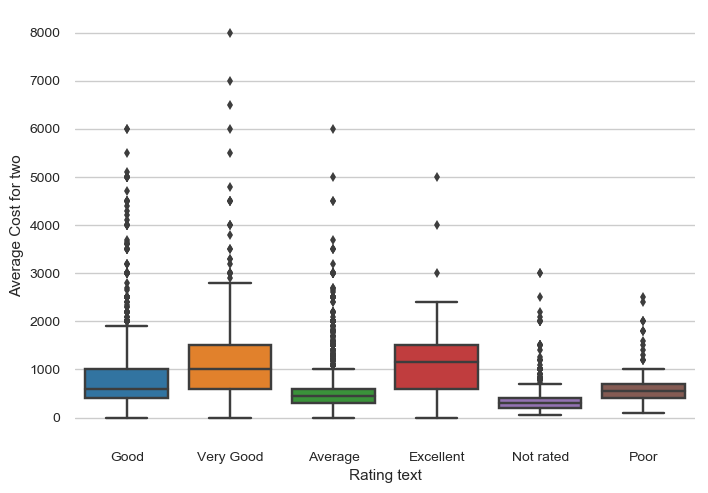

In [0]:
# Relationship between Average Cost for two and Rating text

sns.boxplot(y = 'Average Cost for two', x = 'Rating text', data = zomato_india)

Ratings improve as the average cost for two increases.

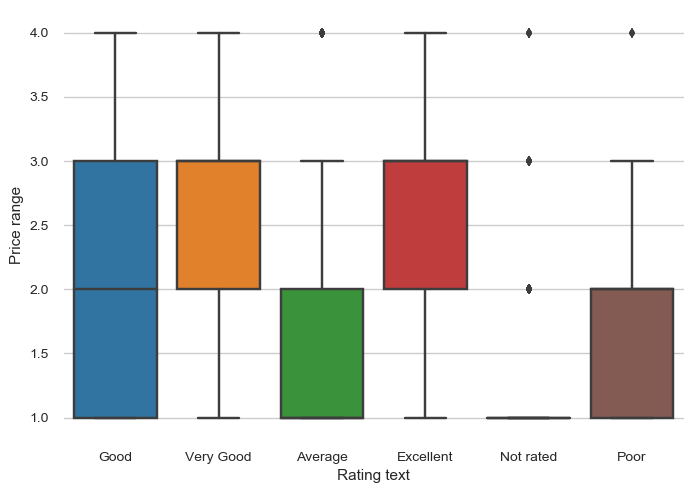

In [0]:
# Relationship between Price range and Rating text

sns.boxplot(y = 'Price range', x = 'Rating text', data = zomato_india)

**Excellent and Very Good** restaurants have very high price.  <br>
**Average and Poor** have the lowest price range.

### Lets identify restaurants which have high price range and low ratings

In [0]:
zomato_india['Price range'].value_counts()

1    4295
2    2858
3    1111
4     388
Name: Price range, dtype: int64

In [0]:
# Lets have a look at the expensive restaurants

exp_india_restaurant = zomato_india[zomato_india['Price range'] == 4]
exp_india_restaurant

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
629,3400325,MoMo Cafe,1,Agra,"Courtyard by Marriott Agra, Phase 2, Fatehabad...","Courtyard by Marriott Agra, Tajganj","Courtyard by Marriott Agra, Tajganj, Agra",0.000000,0.000000,"North Indian, European",...,No,No,No,No,4,4.0,Green,Very Good,45,India
630,3400059,Peshawri - ITC Mughal,1,Agra,"ITC Mughal, Fatehabad Road, Tajganj, Agra","ITC Mughal, Tajganj","ITC Mughal, Tajganj, Agra",78.044095,27.160934,"North Indian, Mughlai",...,No,No,No,No,4,4.3,Green,Very Good,133,India
631,3400060,Taj Bano - ITC Mughal,1,Agra,"ITC Mughal, Fatehabad Road, Tajganj, Agra","ITC Mughal, Tajganj","ITC Mughal, Tajganj, Agra",78.044095,27.160934,Mughlai,...,No,No,No,No,4,4.0,Green,Very Good,41,India
633,3400072,Dawat-e-Nawab - Radisson Blu,1,Agra,"Radisson Blu, Taj East Gate Road, Tajganj, Agra","Radisson Blu, Tajganj","Radisson Blu, Tajganj, Agra",78.057044,27.163303,"North Indian, Mughlai",...,No,No,No,No,4,3.8,Yellow,Good,46,India
638,3400350,Bon Barbecue,1,Agra,"Parador Hotel, 3A-3B, Phase 1, Fatehabad Road,...",Tajganj,"Tajganj, Agra",0.000000,0.000000,"North Indian, Chinese, Continental",...,No,No,No,No,4,3.8,Yellow,Good,57,India
645,110502,Patang - The Revolving Restaurant,1,Ahmedabad,"Chinubhai Tower, Nehru Bridge Corner, Ashram R...",Ashram Road,"Ashram Road, Ahmedabad",72.572009,23.026165,"Continental, Chinese, North Indian",...,No,No,No,No,4,3.7,Yellow,Good,1315,India
679,2400195,Cafe El Chico,1,Allahabad,"24, Mahatma Gandhi, Civil Lines, Allahabad",Civil Lines,"Civil Lines, Allahabad",81.836167,25.449872,"Continental, Italian",...,No,No,No,No,4,3.6,Yellow,Good,59,India
712,2500024,Madhuban Restaurant - Welcome Hotel Rama Inter...,1,Aurangabad,"Welcome Hotel Rama International, Opposite Hig...",CIDCO,"CIDCO, Aurangabad",75.358888,19.875908,"North Indian, Chinese, Continental, Italian, M...",...,No,No,No,No,4,3.4,Orange,Average,94,India
727,58268,The Fatty Bao - Asian Gastro Bar,1,Bangalore,"610, 3rd Floor, 12th Main, Off 80 Feet Road, I...",Indiranagar,"Indiranagar, Bangalore",77.645396,12.970221,Asian,...,Yes,Yes,No,No,4,4.7,Dark Green,Excellent,2369,India
728,51705,Toit,1,Bangalore,"298, Namma Metro Pillar 62, 100 Feet Road, Ind...",Indiranagar,"Indiranagar, Bangalore",77.640709,12.979166,"Italian, American, Pizza",...,No,No,No,No,4,4.8,Dark Green,Excellent,10934,India


In [0]:
# Lets check the ratings of these restaurants

exp_india_restaurant['Rating text'].value_counts()

Good         167
Very Good     97
Average       88
Excellent     20
Not rated     11
Poor           5
Name: Rating text, dtype: int64

**As the price range is high, most of the ratings are good.**  <br>
So if price is high, why will be there be 5 poor ratings?

In [0]:
# Low rated expensive restaurants

exp_india_restaurant[exp_india_restaurant['Rating text'] == 'Poor']

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
1247,306134,The Wine Company,1,Gurgaon,"Cyber Hub, DLF Cyber City, Gurgaon","Cyber Hub, DLF Cyber City","Cyber Hub, DLF Cyber City, Gurgaon",77.089048,28.496228,"Italian, European",...,Yes,No,No,No,4,2.4,Red,Poor,2412,India
8045,718,Americana Kitchen and Bar,1,Noida,"Ist Floor, 1-6, Centre Stage Mall, Sector 18, ...","Centre Stage Mall, Sector 18","Centre Stage Mall, Sector 18, Noida",77.322828,28.568343,"American, Tex-Mex, Italian, Mexican, North Indian",...,Yes,No,No,No,4,2.4,Red,Poor,221,India
8467,4717,RPM - Zanzi Bar,1,Noida,"B-110, Gautam Budh Nagar, Sector 18, Noida",Sector 18,"Sector 18, Noida",77.325299,28.570669,"Chinese, North Indian",...,Yes,No,No,No,4,2.4,Red,Poor,103,India
9050,3212,Chicane,1,Noida,"205-A, 1st Floor, Spice World Mall, Sector 25-...","Spice World Mall, Sector 25","Spice World Mall, Sector 25, Noida",77.341021,28.585493,"European, North Indian, Chinese",...,Yes,No,No,No,4,2.2,Red,Poor,116,India
9105,3237,Club Ice Cube,1,Noida,"313, 3rd Floor, The Great India Place Mall, Se...","The Great India Place, Sector 38","The Great India Place, Sector 38, Noida",77.326475,28.568067,"North Indian, Continental, Chinese",...,Yes,No,No,No,4,2.0,Red,Poor,230,India


In [0]:
list_of_cuisines = exp_india_restaurant[exp_india_restaurant['Rating text'] == 'Poor']['Cuisines']
list_of_cuisines.values

array(['Italian, European',
       'American, Tex-Mex, Italian, Mexican, North Indian',
       'Chinese, North Indian', 'European, North Indian, Chinese',
       'North Indian, Continental, Chinese'], dtype=object)

**Observations**: These are 5 restaurants which are really expensive but do not have good ratings. <br>
**Lets have a look at what is their cuisines.**

In [0]:
text = ' '.join([j for j in list_of_cuisines.values])
text

'Italian, European American, Tex-Mex, Italian, Mexican, North Indian Chinese, North Indian European, North Indian, Chinese North Indian, Continental, Chinese'

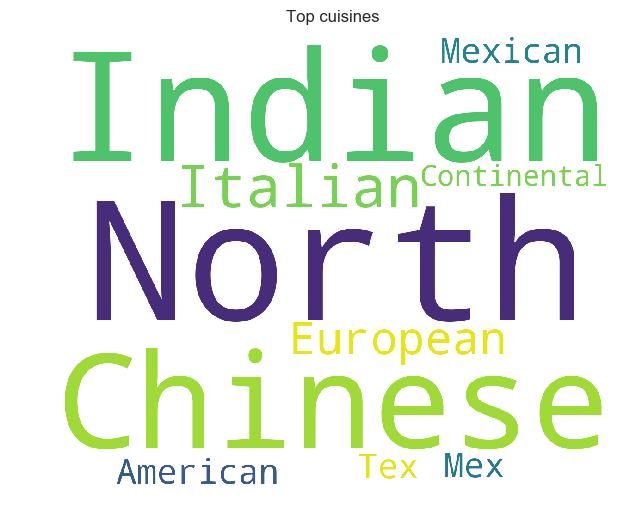

In [0]:
# Wordcloud of Cuisine

from wordcloud import WordCloud

plt.figure(figsize = (12, 6))
text = ' '.join([j for j in list_of_cuisines.values])
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top cuisines')
plt.axis("off")
plt.show()

**North Indian** is the most popular cuisine. So we can infer that these North Indian restaurants in Gurgaon and Noida which do not provide authentic North Indian dishes and that is why customers are unhappy and rate them poorly.

### Lets look at all the restaurants which have poor ratings.

In [0]:
bad_rated_restaurants = zomato_india[zomato_india['Rating text'] == 'Poor']
bad_rated_restaurants

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
890,311051,KFC,1,Faridabad,"Shops 21-22, 2nd Floor, Crown Interiorz Mall, ...","Crown Interiorz Mall, Sector 35, Faridabad","Crown Interiorz Mall, Sector 35, Faridabad, Fa...",77.307060,28.469807,"American, Fast Food, Burger",...,No,Yes,No,No,2,2.1,Red,Poor,57,India
896,8128,Mirage Restro Bar,1,Faridabad,"2nd Floor, Crown Plaza Mall, Sector 15-A, Sect...","Crown Plaza Mall, Sector 15, Faridabad","Crown Plaza Mall, Sector 15, Faridabad, Faridabad",77.313102,28.397808,"North Indian, Mughlai",...,Yes,No,No,No,3,2.4,Red,Poor,25,India
1138,1683,Pind Balluchi,1,Ghaziabad,"Shop 34-40, Level 3, Shipra Mall, Gulmohar Roa...","Shipra Mall, Indirapuram","Shipra Mall, Indirapuram, Ghaziabad",77.370165,28.633970,"North Indian, Mughlai",...,Yes,Yes,No,No,3,1.8,Red,Poor,322,India
1247,306134,The Wine Company,1,Gurgaon,"Cyber Hub, DLF Cyber City, Gurgaon","Cyber Hub, DLF Cyber City","Cyber Hub, DLF Cyber City, Gurgaon",77.089048,28.496228,"Italian, European",...,Yes,No,No,No,4,2.4,Red,Poor,2412,India
1263,225,Domino's Pizza,1,Gurgaon,"UGF/RTC 9, Building 8, Tower C, DLF- 2, DLF Cy...",DLF Cyber City,"DLF Cyber City, Gurgaon",77.089048,28.494525,"Pizza, Fast Food",...,No,No,No,No,2,2.4,Red,Poor,125,India
1278,4620,Sugar & Spice - Le Marche,1,Gurgaon,"SG-84 & 85, DLF Galleria, DLF Phase 4, Gurgaon","DLF Galleria, DLF Phase 4","DLF Galleria, DLF Phase 4, Gurgaon",77.081224,28.467149,"Bakery, Fast Food",...,No,No,No,No,2,2.4,Red,Poor,88,India
1296,311116,KFC,1,Gurgaon,"MS-44, Upper Ground Floor, DLF Mega Mall, DLF ...","DLF Mega Mall, DLF Phase 1","DLF Mega Mall, DLF Phase 1, Gurgaon",77.093514,28.476508,"American, Fast Food, Burger",...,No,Yes,No,No,2,2.2,Red,Poor,73,India
1395,4172,Aahar,1,Gurgaon,"U-6/50, DLF Phase 3, Gurgaon",DLF Phase 3,"DLF Phase 3, Gurgaon",77.094326,28.492384,"North Indian, South Indian, Chinese",...,No,Yes,No,No,1,2.0,Red,Poor,60,India
1396,310525,Chicken Bytes,1,Gurgaon,"Shop 4, U-6/50, DLF Phase 3, Gurgaon",DLF Phase 3,"DLF Phase 3, Gurgaon",77.094263,28.492337,"North Indian, Mughlai, Chinese",...,No,Yes,No,No,2,2.1,Red,Poor,34,India
1397,300054,Flying Cakes,1,Gurgaon,"Shop 3, U-6/50, DLF Phase 3, Gurgaon",DLF Phase 3,"DLF Phase 3, Gurgaon",77.094353,28.492435,Bakery,...,No,Yes,No,No,1,2.2,Red,Poor,136,India


In [0]:
bad_rated_restaurants.shape

(180, 22)

In [0]:
bad_rated_restaurants['Has Online delivery'].value_counts()

Yes    116
No      64
Name: Has Online delivery, dtype: int64

In [0]:
bad_rated_restaurants['Is delivering now'].value_counts()

No     179
Yes      1
Name: Is delivering now, dtype: int64

**Many of these restaurants are not available for delivery most of the time. Hence people provide poor rating to them.**

### City wise Analysis of Poor Rated restaurants

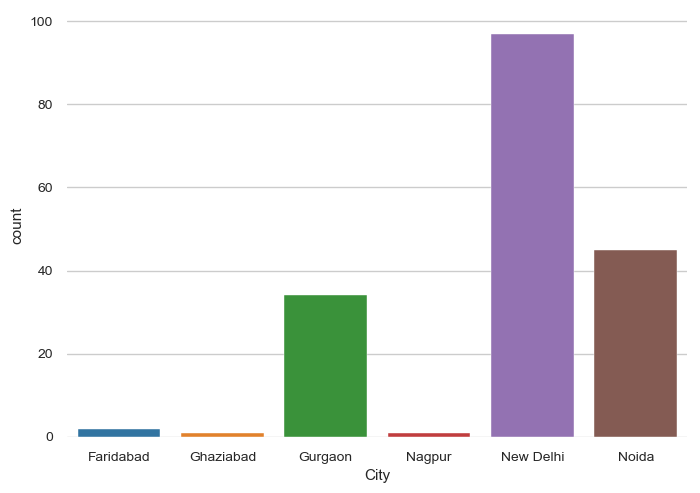

In [0]:
sns.countplot(x = 'City', data = bad_rated_restaurants)

**Why are ratings of New Delhi, Noida and Gurgaon bad?**

In [0]:
# Total no. of bad restaurants

bad_rated_restaurants['City'].value_counts()

New Delhi    97
Noida        45
Gurgaon      34
Faridabad     2
Ghaziabad     1
Nagpur        1
Name: City, dtype: int64

In [0]:
# Total number of restaurants

top_3_cities = zomato_india['City'].value_counts().head(3)
top_3_cities

New Delhi    5473
Gurgaon      1118
Noida        1080
Name: City, dtype: int64

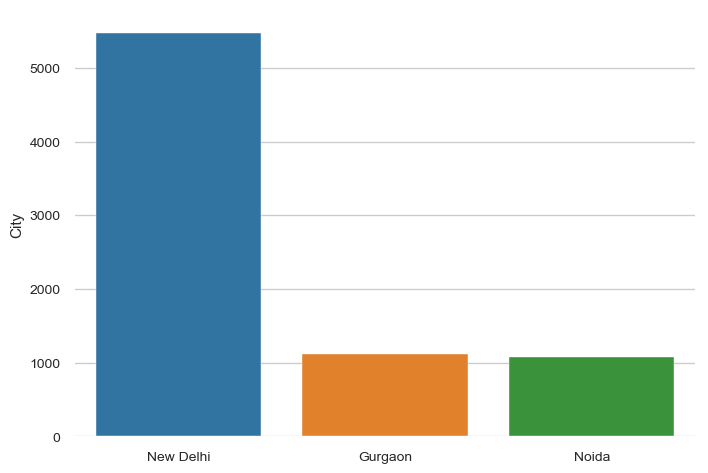

In [0]:
sns.barplot(y = top_3_cities, x = top_3_cities.index)

**Hence we cannot conclude that these 3 cities have significantly large number of bad restaurants as the total number of restaurants is also high.**

**Observation**: Restaurants which are delivering now have better ratings than the one which are not.